# Mutating an ensemble

In [3]:
# This simulates the installation the user will be able tu just import pyFoldx.Trajectory
import sys
sys.path.append("/home/lradusky/Dropbox/workspacesbg/pyFoldX")

In [4]:
from pyfoldx.structure import Ensemble

In [3]:
#Other imports
import seaborn as sns
import matplotlib.pyplot as plt

We create an Ensemble just loading the one we saved in the previous tutorial

In [4]:
pathEnsbl = "/home/lradusky/Downloads/P01112/"
inEnsbl = pathEnsbl+"ensemble.pdb"

In [5]:
t = Ensemble("P01112", pathEnsbl, inEnsbl)

To mutate an ensemble we just have to call the *mutate* function. We need to specify:

- Which mutations we want to model, in the format ORIGINAL_RESIDUE + POSITION + MUTATED_RESIDUE separated by comma for each mutation.
- If we want to generate a mutations ensemble: if True, ensembles with all the wild type and mutated models will be generated. Note that this can be memory consuming for big ensembles.

In [6]:
ddGsDataFrame, trajMut, trajWT = t.mutate("G13A", generate_mutations_ensemble=True)

Computing mutation(s) G13A along ensemble...
100%|██████████| 31/31 [05:39<00:00, 10.96s/it]
Mutations computed.


As we can observe, those crystals without the specified wild type residue in the specified position or that presents a problem will be excluded from the output.

In [7]:
# We can save the generated ensembles into files
trajMut.toPdbFile(pathEnsbl+"mutated.pdb")
trajWT.toPdbFile(pathEnsbl+"WT.pdb")

And the *mutate* function will return a Pandas DataFrame with the $\Delta \Delta G$ provoked by the mutation(s) along the ensemble.

In [8]:
ddGsDataFrame

,total,backHbond,sideHbond,energy_VdW,electro,energy_SolvP,energy_SolvH,energy_vdwclash,entrop_sc,entrop_mc,...,cis_bond,energy_torsion,backbone_vdwclash,energy_dipole,water,disulfide,energy_kon,partcov,energyIonisation,entr_complex
4DLY_A,3.42553,-0.0209206,1.42109e-14,-0.410503,-0.0161576,0.599521,-0.57374,1.69729,0.0273743,2.12267,...,0,0,0.171233,0,0,0,0,0,0,0
4DLR_A,3.18347,-0.00864406,0,-0.4156,-0.0151793,0.583348,-0.575608,1.7512,0.0301551,1.8338,...,0,0,0.160413,0,0,0,0,0,0,0
4DLV_A,3.04597,-0.0180345,0,-0.394268,-0.0175159,0.579542,-0.539392,1.57196,0.0256251,1.83805,...,0,1.77636e-15,0.16507,0,0,0,0,0,0,0
3RRY_A,2.98276,-0.0081,0,-0.377113,-0.0202257,0.525625,-0.534426,1.55349,0.00980657,1.83371,...,0,-1.77636e-15,0.152027,0,0,0,0,0,0,0
3RS0_A,3.14353,-0.0235101,0,-0.372428,-0.0126331,0.56181,-0.50336,1.64227,0.0256731,1.82571,...,0,8.88178e-16,0.153475,0,0,0,0,0,0,0
2RGB_A,2.9752,-0.00529771,7.10543e-15,-0.376114,-0.014456,0.545797,-0.530453,1.52137,0.00942189,1.82493,...,0,0,0.158783,0,0,0,0,0,0,0
5WDQ_A,3.11636,-0.00826318,0,-0.37777,-0.0124022,0.525428,-0.527206,1.65363,0.0297619,1.83318,...,0,9.34258e-07,0.121469,0,0,0,0,0,0,0
3RSO_A,3.20194,-0.0168356,-1.53051e-11,-0.390201,-0.024805,0.590189,-0.521601,1.59557,0.0284901,1.93987,...,0,9.66861e-05,0.207521,0.00116986,0,0,0,2.17426e-12,1.11022e-16,0
3RRZ_A,3.0994,-0.0059,0,-0.390781,-0.0151739,0.576756,-0.534923,1.61135,0.0255523,1.83252,...,0,0,0.150408,0,0,0,0,0,0,0
5WDP_A,3.14222,-0.0241588,0,-0.380216,-0.0142514,0.597069,-0.493903,1.60453,0.0275674,1.82559,...,0,0,0.153092,0,0,0,0,0,0,0


Let's, for example, analyze the energy changes provoked by the mutations along the ensemble.

/home/lradusky/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


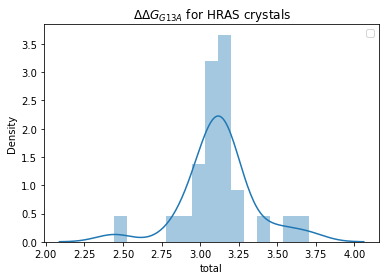

In [10]:
sns.distplot(ddGsDataFrame.total).set_title("$\Delta \Delta G_{G13A}$ for HRAS crystals")
plt.legend()

As can be seen, depending on the structure we have different $\Delta \Delta G$s, but all of them presents a high value, allowing us to infer that the mutation is destabilizing.